# Understanding Network Data Structures

A network can be represented in multiple ways, as long as *nodes* and *edges* are effectively captured by a representation. 

Data structures of networks include but are not limited to:

- Adjacency List
- Adjacency Matrix
- Edge List (combined with Node List)

For two-mode networks, a specific type of matrix named *affiliation matrix* can be used. 

Because each data structure does the same job -- containing information about nodes and edges -- you can convert from one data structure to another. 

## Network Data Structures in NetworkX

In NetworkX, the most popular data structures mentioned above are supported. Besides, NetworkX provides functions to read and write multiple types of file formats (e.g., GML) that other software packages work with. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Let's create a simple star graph to illustrate different data structures. 

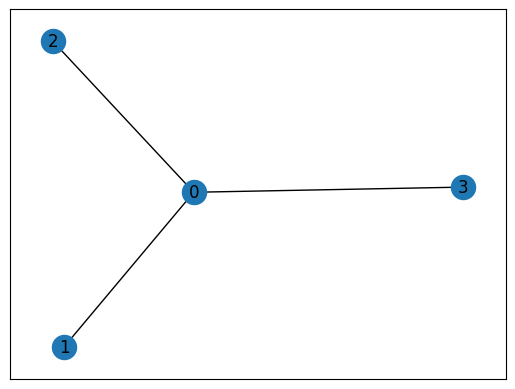

In [2]:
G = nx.star_graph(3)
# G = nx.complete_graph(4)
# G = nx.cycle_graph(4)
nx.draw_networkx(G)

In [3]:
G.adj

AdjacencyView({0: {1: {}, 2: {}, 3: {}}, 1: {0: {}}, 2: {0: {}}, 3: {0: {}}})

Below, we are convert this simple graph to different data structures.

Using these data structures, you can construct such a star graph. 

### Adjacency List

In [4]:
# Write the graph's Adjacency List to a file
nx.write_adjlist(G, "data/star3.adjlist")

# Print out the graph's Adjacency List
for line in nx.generate_adjlist(G):
    print(line)

0 1 2 3
1
2
3


Imagine you have a file with such a Adjacency List, you can read it into NetworkX to create a new graph.

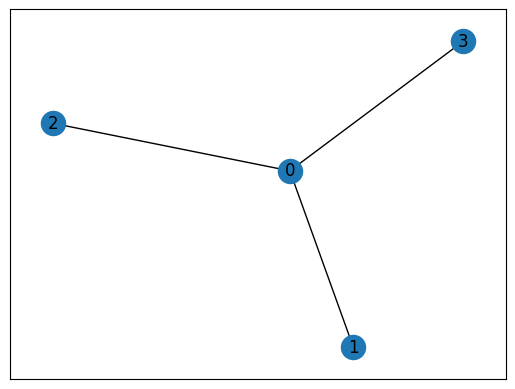

In [5]:
G2 = nx.read_adjlist("data/star3.adjlist", create_using=nx.Graph)
nx.draw_networkx(G2)

### Adjacency Matrix

In [6]:
# Get the graph's adjacency matrix
mat = nx.adjacency_matrix(G)

# Print the adj matrix
print(mat.todense())

[[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [7]:
# Another way to get the adj matrix
ar = nx.to_numpy_array(G)

print(ar)

[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


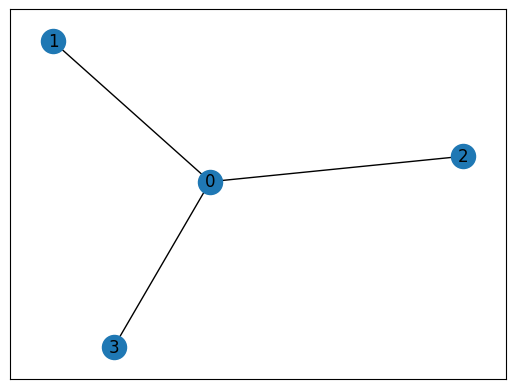

In [8]:
# Create the graph from the array
G3 = nx.from_numpy_array(ar)

nx.draw_networkx(G3)

### Edge List

An edge list is simply a list of edges.

A node list is also needed in these situations:

- If some nodes do not appear in the edge list (aka. there are isolated nodes)
- If node attributes are of interest

In [9]:
# Get the edge list
nx.to_edgelist(G)

EdgeDataView([(0, 1, {}), (0, 2, {}), (0, 3, {})])

In [10]:
# Another way to get the edge list into a Pandas data frame
edge_list_df = nx.to_pandas_edgelist(G)
edge_list_df

,source,target
0,0,1
1,0,2
2,0,3


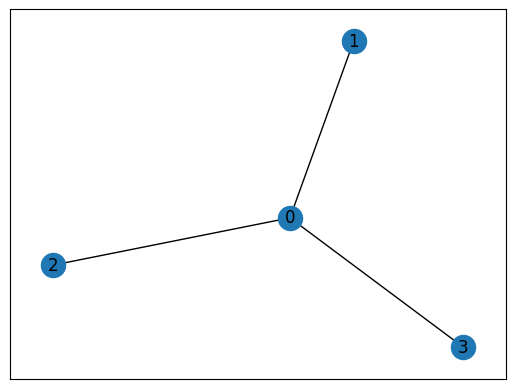

In [11]:
# Create a graph from a data frame
G4 = nx.from_pandas_edgelist(edge_list_df)
nx.draw_networkx(G4)

In [12]:
# Let's create a node list with two columns
node_list_df = df = pd.DataFrame(
    {'id': [0, 1, 2, 3, 4], 
     'color': ['red', 'blue', 'blue', 'blue', 'blue']}
     )
node_list_df

,id,color
0,0,red
1,1,blue
2,2,blue
3,3,blue
4,4,blue


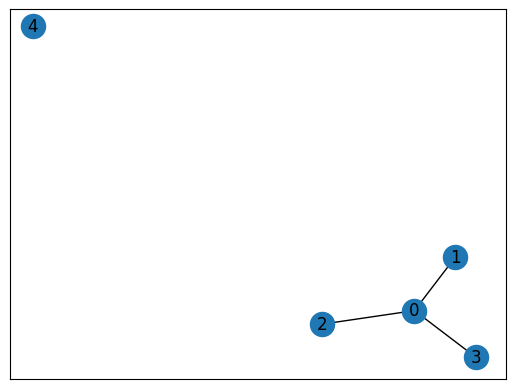

In [13]:
G5 = nx.Graph()

# Add nodes from the DataFrame to the existing network
for _, row in node_list_df.iterrows():
    G5.add_node(row['id'], color=row['color'])

# Add edges from the DataFrame to the existing network
for _, row in edge_list_df.iterrows():
    G5.add_edge(row['source'], row['target'])

nx.draw_networkx(G5)

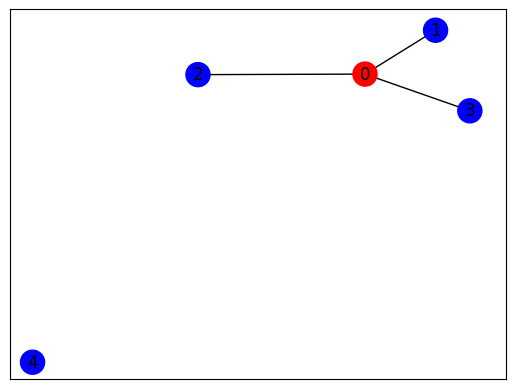

In [14]:
# Let's grab node attribute 'color' for plotting
node_colors = [G5.nodes[node]['color'] for node in G5.nodes()]

nx.draw_networkx(G5, node_color = node_colors)